# Machine Learning

## Set up

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data
df = pd.read_pickle("sample")
# show numerical values
df.describe()

In [44]:
# convert duration data to seconds
df['life_days'] = df['life'].dt.days
df['prep_days'] = df['prep'].dt.days

In [107]:
# keep only successful / fail projects
# keep only US projects
# keep only numerical/categorical variables

data = df[(df.location_country =="US") & ((df.state == "successful")|(df.state == "failed"))].reset_index(drop = True)
DropCol = ['location_country','location_state','location_localized_name','location_name','cbsa_name','creator_name',
      'category_name','launched_at','deadline','state_changed_at','life','duration','prep']
data = data.drop(DropCol,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159925 entries, 0 to 159924
Data columns (total 10 columns):
top100            156804 non-null object
backers_count     159925 non-null int64
goal              159925 non-null float64
pledged           159925 non-null float64
gender            159925 non-null object
category_broad    159925 non-null category
state             159925 non-null category
slug              159925 non-null object
life_days         159925 non-null int64
prep_days         159925 non-null int64
dtypes: category(2), float64(2), int64(3), object(3)
memory usage: 10.1+ MB


## Text Analysis 
TODO, sentiment and structure analysis of headline. Reference: http://nbviewer.jupyter.org/github/AYLIEN/headline_analysis/blob/06f1223012d285412a650c201a19a1c95859dca1/main-chunks.ipynb#A-primer-on-parse-trees

In [108]:
data.slug.sample(5)

59977               airtight-assembly-music-video-lady-boss
93579                 unarmed-civilian-in-ferguson-missouri
15532                     schoolsquare-helping-kids-succeed
148400              the-lonely-boomer-a-comedy-feature-film
75258     unknown-realm-an-8bit-rpg-for-pc-and-commodore-64
Name: slug, dtype: object

## Scaling and normalization

,backers_count,goal,pledged,life_days,prep_days
backers_count,1.000000,0.007153,0.737697,0.002671,0.020596
goal,0.007153,1.000000,0.007825,0.022907,0.002539
pledged,0.737697,0.007825,1.000000,0.011743,0.019450
life_days,0.002671,0.022907,0.011743,1.000000,0.008228
prep_days,0.020596,0.002539,0.019450,0.008228,1.000000


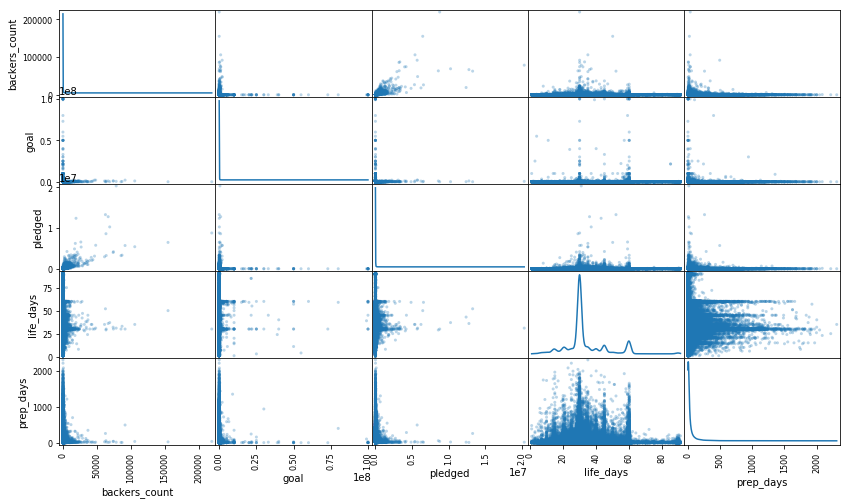

In [61]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.corr()

In [91]:
NumCol = ['backers_count','goal','pledged','life_days','prep_days']
data[NumCol] = np.log(data[NumCol]+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2744c588>,
      dtype=object)

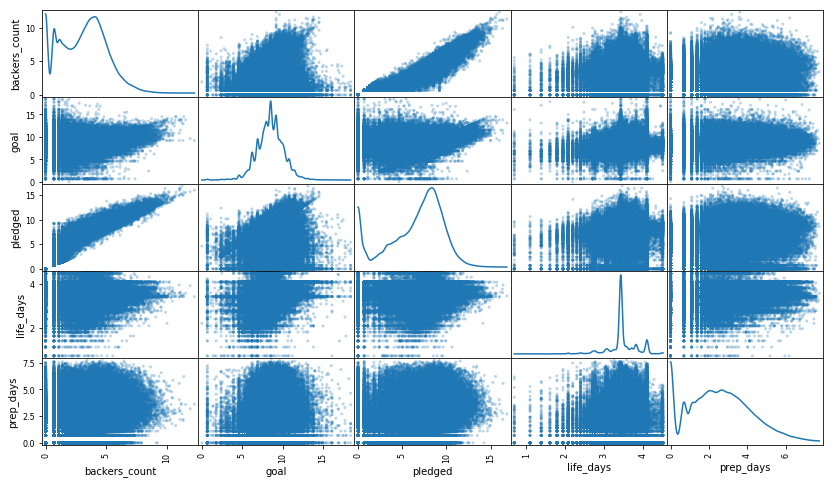

In [92]:
pd.plotting.scatter_matrix(data[NumCol], alpha = 0.3, figsize = (14,8), diagonal = 'kde')

## Remove Outliers

In [93]:
import collections
c = collections.Counter()

for feature in NumCol:
    
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    
    step = 1.5 * (Q3 - Q1)
    
    outlier = data[(~(data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    
    c.update(outlier.index)

In [94]:
outliers = []

# remove projects that have at least 2 outlier features

for ind,num in c.items(): 
    if num >= 2:
        outliers.append(ind)
        
len(outliers)/len(data)

0.005758949507581679

In [95]:
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

In [96]:
good_data.describe()

,backers_count,goal,pledged,life,duration,prep,life_days,prep_days
count,159004.000000,159004.000000,159004.000000,159004,159004,159004,159004.000000,159004.000000
mean,3.076558,8.515938,6.432152,33 days 18:34:34.901706,33 days 18:35:06.126569,44 days 21:18:53.851054,3.479441,2.473131
std,1.915631,1.588539,3.201484,12 days 12:21:35.584738,12 days 12:21:53.846979,115 days 12:43:17.438079,0.367221,1.620649
min,0.000000,0.693147,0.000000,1 days 00:00:00,1 days 00:00:00,0 days 00:02:52,0.693147,0.000000
25%,1.386294,7.601402,4.615121,30 days 00:00:00,30 days 00:00:00,3 days 00:06:33.500000,3.433987,1.386294
50%,3.218876,8.517393,7.273786,30 days 00:00:00,30 days 00:00:01,11 days 00:09:41,3.433987,2.484907
75%,4.430817,9.472782,8.715880,35 days 08:33:51.750000,35 days 08:37:42.750000,35 days 15:43:59,3.583519,3.583519
max,12.298574,18.420681,16.828050,91 days 23:00:00,91 days 23:00:18,2313 days 16:40:37,4.521789,7.746733


## One-hot-encoding categorical variables

In [98]:
cat = ['gender','top100', 'category_broad']
data_dummies = pd.get_dummies(data, columns = cat)
data_dummies.describe()

,backers_count,goal,pledged,life,duration,prep,life_days,prep_days,gender_andy,gender_female,...,category_broad_fashion,category_broad_film & video,category_broad_food,category_broad_games,category_broad_journalism,category_broad_music,category_broad_photography,category_broad_publishing,category_broad_technology,category_broad_theater
count,159925.000000,159925.000000,159925.000000,159925,159925,159925,159925.000000,159925.000000,159925.000000,159925.000000,...,159925.000000,159925.000000,159925.000000,159925.00000,159925.000000,159925.000000,159925.000000,159925.000000,159925.000000,159925.000000
mean,3.071823,8.488673,6.422062,33 days 15:43:38.438561,33 days 15:44:09.554090,44 days 18:15:56.642801,3.473913,2.467488,0.010073,0.176970,...,0.044877,0.159362,0.070421,0.07411,0.016752,0.166816,0.024668,0.127103,0.082708,0.028395
std,1.914103,1.626298,3.199916,12 days 14:00:18.678735,12 days 14:00:36.900525,115 days 09:12:26.552228,0.375484,1.621652,0.099860,0.381645,...,0.207035,0.366015,0.255855,0.26195,0.128340,0.372812,0.155111,0.333090,0.275440,0.166098
min,0.000000,0.009950,0.000000,1 days 00:00:00,1 days 00:00:00,0 days 00:02:52,0.693147,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.386294,7.601402,4.615121,30 days 00:00:00,30 days 00:00:00,2 days 23:39:01,3.433987,1.098612,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.218876,8.517393,7.252762,30 days 00:00:00,30 days 00:00:01,10 days 22:54:38,3.433987,2.397895,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.430817,9.472782,8.709795,35 days 05:07:06,35 days 05:07:34,35 days 10:20:15,3.583519,3.583519,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.298574,18.420681,16.828050,91 days 23:00:00,91 days 23:00:18,2313 days 16:40:37,4.521789,7.746733,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
